In [2]:
import cv2
path_img = './Face samples/Dumbledores/dbd0.jpeg'
img = cv2.imread(path_img)
print(type(img))
print(img.shape) # row, col, bgr = h, w, bgr
print(img[0,0,])

<class 'numpy.ndarray'>
(239, 211, 3)
[1 1 1]


In [3]:
cv2.imshow('DBD', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

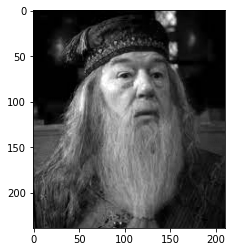

In [4]:
import matplotlib.pyplot as plt
# plt.imshow(img[:,:,-1])
plt.imshow(img[:,:,-1], cmap='gray')

In [ ]:
img2 = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE)
# cv2.imshow('img', img)
plt.imshow(img2, cmap='gray')

In [ ]:
img[100,0,:]

In [ ]:
img[0,0,:]

In [ ]:
blue = img[:,:,0]
green = img[:,:,1]
red = img[:,:,2]

In [ ]:
plt.imshow(blue, cmap='gray', interpolation='none')

In [ ]:
plt.imshow(green, cmap='gray', interpolation='none')

In [ ]:
plt.imshow(red, cmap='gray', interpolation='none')


# Open VDO

### Read vdo

In [ ]:
path_vdo = './johny-amber-court.mp4'
cap = cv2.VideoCapture(path_vdo)
import time
while(cap.isOpened()):
    ret, frame = cap.read() # read frame by frame
    if ret == True:
        cv2.imshow('Case', frame)
        if cv2.waitKey(1) & 0xFF ==ord('q'): break
    else:
        break
cap.release()
cv2.destroyAllWindows()
            

### Read VDO with scale down & Cut some part

In [ ]:
path_vdo = './johny-amber-court.mp4'
scale = .2 # if 20 = pc freezing
cap = cv2.VideoCapture(path_vdo)

if(cap.isOpened()==False):
    print('Could not open the VDO file')
frame_counter = 0
while(cap.isOpened()):
    ret, frame = cap.read() # read frame by frame
    if ret == True:
        frame_counter += 1
    
        if frame_counter >= cap.get(cv2.CAP_PROP_FRAME_COUNT):
            frame_count = 0
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_counter)
            
            # Scale vdo down or up
        frame = cv2.resize(frame, None, fx=scale, fy=scale,
                              interpolation=cv2.INTER_AREA)
        frame[:,5:20,0] = 0 # elim blue val
        frame[:,5:20,1] = 0 # elim green val
        frame[:,5:20,2] = 255 # allowed super red
        cv2.imshow('Case', frame)
            
        if cv2.waitKey(1) & 0xFF ==ord('q'): break
    else:
        break
cap.release()
cv2.destroyAllWindows()
            

# Check whether cam is ok

In [ ]:
source = 0 # cam's id
cap = cv2.VideoCapture(source)
if cap is None or not cap.isOpened():
    print('Could not open vdo source: ', source)
else:
    print('vdo source OK =>', source)
    cap.release()

# Using Cam

In [ ]:
cap = cv2.VideoCapture(source)
cap.set(3, 640) # w
cap.set(4, 480) # h

if (cap.isOpened()==False):
    print('Could not open VDO source')
while (cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        cv2.imshow('Cam', frame)
        if cv2.waitKey(3) & 0xFF == 27 : break
    else:
        break
cap.release()
cv2.destroyAllWindows()


# Face Detection

In [3]:
import cv2
scale =.5
# img_path = './Face samples/justin.jpg'
img_path = './Face samples/hyungwon.jpeg'

casc_file = 'haarcascade_frontalface_default.xml'

frontal_face = cv2.CascadeClassifier(casc_file)
img = cv2.imread(img_path)
cv2.imshow('Face', img)
# scale img down
img = cv2.resize(img, None, fx=scale, fy=scale, 
                 interpolation=cv2.INTER_AREA)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# face detection
bBoxes = frontal_face.detectMultiScale(
    gray_img, scaleFactor=1.3, minNeighbors=5, minSize=(30,30)
)
print('Found {} faces'.format(len(bBoxes)))

# draw reactangle on face
for (x,y,w,h) in bBoxes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
cv2.imshow('Face', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Found 1 faces


In [17]:
source = 0
cap = cv2.VideoCapture(source)
cap.set(3, 640) # w
cap.set(4, 480) # h

frontal_face = cv2.CascadeClassifier(casc_file)

if (cap.isOpened()==False):
    print('Could not open VDO source')
while (cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        img = cv2.resize(img, None, fx=scale, fy=scale, 
                         interpolation=cv2.INTER_AREA)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        bBoxes = frontal_face.detectMultiScale(
            gray_img, scaleFactor=1.3, minNeighbors=5, minSize=(30,30)
        )
        for (x,y,w,h) in bBoxes:
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
        cv2.imshow('Cam', frame)
        if cv2.waitKey(3) & 0xFF == 27 : break
    else:
        break
cap.release()
cv2.destroyAllWindows()

Could not open VDO source
